# Time series analysis

#### Basics of stock data
#### technical analysis

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
from datetime import datetime

In [5]:
voltas=yf.download("VOLTAS.NS", start='2016-01-01')

[*********************100%%**********************]  1 of 1 completed


In [9]:
voltas.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,324.000000,324.500000,316.250000,319.250000,298.521851,674414
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347748,1083585
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869873,1104220
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851685,1090119
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441101,1851263


In [10]:
voltas.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-04,844.000000,848.450012,830.549988,837.849976,837.849976,995617
2023-12-05,841.900024,846.950012,825.400024,832.500000,832.500000,1388896
2023-12-06,839.000000,849.900024,833.700012,845.049988,845.049988,1717573
2023-12-07,845.549988,869.950012,833.099976,866.049988,866.049988,2356938
2023-12-08,872.000000,878.599976,844.849976,855.450012,855.450012,2817604


<Axes: xlabel='Date'>

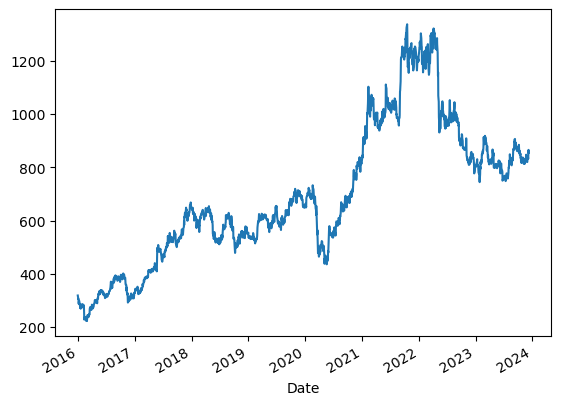

In [6]:
voltas['Close'].plot()

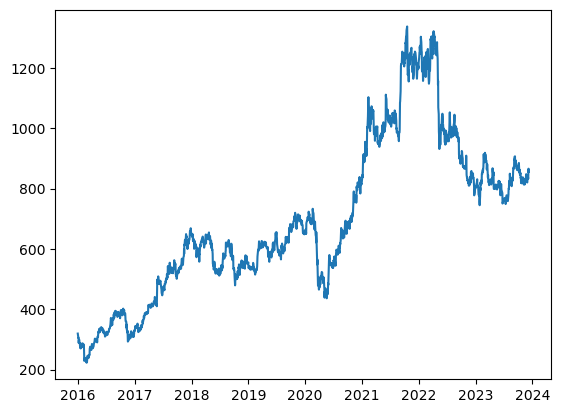

In [7]:
plt.plot(voltas['Close'])

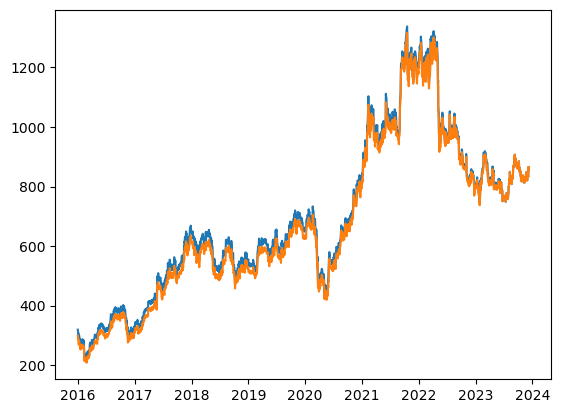

In [8]:
plt.plot(voltas[['Close', 'Adj Close']])

In [9]:
voltas['EMA5'] = voltas['Adj Close'].ewm(span=5, adjust=False).mean()

In [10]:
voltas['EMA21'] = voltas['Adj Close'].ewm(span=21, adjust=False).mean()

In [11]:
voltas.head(10)

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA21
Date,,,,,,,,
2016-01-01,324.000000,324.500000,316.250000,319.250000,298.521912,674414,298.521912,298.521912
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347778,1083585,294.797201,297.506081
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869812,1104220,291.488071,296.357330
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851593,1090119,289.609245,295.402263
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441162,1851263,282.886551,293.042163
2016-01-08,289.899994,299.799988,289.899994,296.649994,277.389252,1362284,281.054118,291.619171
2016-01-11,291.850006,303.100006,287.350006,298.399994,279.025635,997085,280.377957,290.474304
2016-01-12,298.649994,302.899994,285.299988,287.399994,268.739807,1420695,276.498574,288.498440
2016-01-13,289.950012,293.000000,276.450012,288.700012,269.955444,1878302,274.317530,286.812714


<Axes: xlabel='Date'>

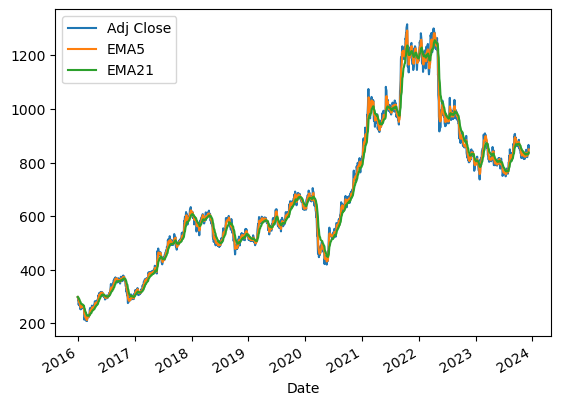

In [12]:
voltas[['Adj Close', 'EMA5', 'EMA21']].plot()

(array([19539., 19570., 19601., 19631., 19662., 19692.]),
 [Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11'),
  Text(19692.0, 0, '2023-12')])

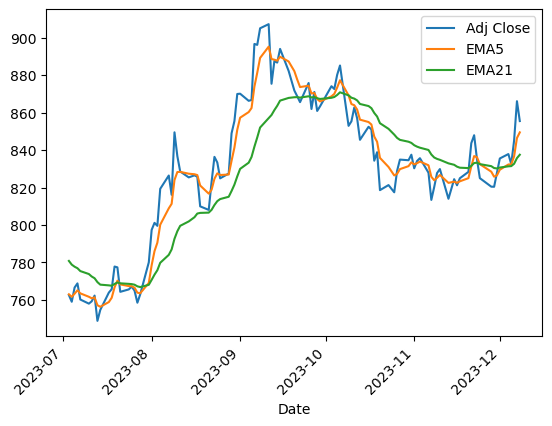

In [13]:
voltas.loc['2023-07-01':'2023-12-08'][['Adj Close','EMA5','EMA21']].plot()
plt.xticks(rotation=45)


Traders and analysts commonly use Exponential Moving Averages (EMAs) with different time periods to analyze trends, identify potential entry or exit points, and make trading decisions.When a short-term EMA (e.g., 5-day) crosses above a longer-term EMA (e.g., 21-day), it may be interpreted as a bullish signal, indicating the potential start of an upward trend. Conversely, a crossover in the opposite direction may signal a potential bearish trend.


In [14]:
voltas['signal']=np.where((voltas.EMA5>voltas.EMA21) & (voltas.EMA5.shift(1)<voltas.EMA21.shift(1)),1,
                   np.where((voltas.EMA5<voltas.EMA21) & (voltas.EMA5.shift(1)>voltas.EMA21.shift(1)),-1,0))

In [15]:
voltas.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA21,signal
Date,,,,,,,,,
2016-01-01,324.000000,324.500000,316.250000,319.250000,298.521912,674414,298.521912,298.521912,0
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347778,1083585,294.797201,297.506081,0
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869812,1104220,291.488071,296.357330,0
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851593,1090119,289.609245,295.402263,0
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441162,1851263,282.886551,293.042163,0


In [16]:
voltas.signal=voltas.signal.shift(1)

In [17]:
voltas.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA21,signal
Date,,,,,,,,,
2016-01-01,324.000000,324.500000,316.250000,319.250000,298.521912,674414,298.521912,298.521912,NaN
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347778,1083585,294.797201,297.506081,0.0
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869812,1104220,291.488071,296.357330,0.0
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851593,1090119,289.609245,295.402263,0.0
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441162,1851263,282.886551,293.042163,0.0


In [18]:
voltas.signal.value_counts()

 0.0    1849
 1.0      56
-1.0      55
Name: signal, dtype: int64

In [19]:
voltas['return']= voltas['Adj Close'].pct_change()

In [20]:
voltas.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA21,signal,return
Date,,,,,,,,,,
2016-01-01,324.000000,324.500000,316.250000,319.250000,298.521912,674414,298.521912,298.521912,NaN,NaN
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347778,1083585,294.797201,297.506081,0.0,-0.037432
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869812,1104220,291.488071,296.357330,0.0,-0.008624
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851593,1090119,289.609245,295.402263,0.0,0.003446
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441162,1851263,282.886551,293.042163,0.0,-0.057409


In [21]:
voltas.dropna(inplace=True)

In [22]:
voltas.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA21,signal,return
Date,,,,,,,,,,
2016-01-04,318.500000,320.000000,303.500000,307.299988,287.347778,1083585,294.797201,297.506081,0.0,-0.037432
2016-01-05,309.000000,309.750000,303.149994,304.649994,284.869812,1104220,291.488071,296.357330,0.0,-0.008624
2016-01-06,303.899994,309.850006,301.200012,305.700012,285.851593,1090119,289.609245,295.402263,0.0,0.003446
2016-01-07,302.149994,302.450012,286.250000,288.149994,269.441162,1851263,282.886551,293.042163,0.0,-0.057409
2016-01-08,289.899994,299.799988,289.899994,296.649994,277.389252,1362284,281.054118,291.619171,0.0,0.029498


In [23]:
AnnualReturn = voltas['return'].mean()*252
print(AnnualReturn)

0.18338059594298511


In [24]:
Annual_sd=voltas['return'].std()*np.sqrt(252)
print(Annual_sd)

0.3096950469155072


In [25]:
# Sharpe Ratio
sharpe_ratio = (AnnualReturn-.07)/Annual_sd
sharpe_ratio

0.36610400157261236

### Creating a time series object

In [ ]:
range_date = pd.date_range(start ='1/1/2019', end ='1/1/2020',freq ='M')
range_date

In [ ]:
pd.date_range(start ='2019-01-01', end ='2020-01-01',freq ='M')

In [ ]:
range_date.shape

In [ ]:
type(range_date)

In [ ]:
df = pd.DataFrame(range_date, columns =['date'])
df.head(6)

In [ ]:
np.random.seed(7)
df['data'] = np.random.randint(0, 100, size =(len(range_date)))

In [ ]:
print(df)

In [ ]:
range_date = pd.date_range(start ='1/1/2019', end ='8/1/2020',freq ='W')
df = pd.DataFrame(range_date, columns =['date'])
df.head()
df['data'] = np.random.randint(0, 100, size =(len(range_date)))

print(df.head(10))

In [ ]:
range_date = pd.date_range(start ='1/1/2019', end ='1/3/2020',freq ='min')
df = pd.DataFrame(range_date, columns =['date'])
df.head()
df['data'] = np.random.randint(0, 100, size =(len(range_date)))

print(df.head(10))

In [ ]:
range_date = pd.date_range(start ='1/1/2019', end ='8/1/2020',freq ='D')
df = pd.DataFrame(range_date, columns =['date'])
df.head()
df['data'] = np.random.randint(0, 100, size =(len(range_date)))

print(df.head(10))

In [ ]:
df.set_index('date').plot(figsize=(8,4))

In [ ]:
range_date = pd.date_range(start ='1/1/2019', end ='8/1/2025',freq ='Y')
df = pd.DataFrame(range_date, columns =['date'])
df.head()
df['data'] = np.random.randint(0, 100, size =(len(range_date)))

print(df.head(10))

In [ ]:
df = df.set_index('date')
df

In [ ]:
print(df[1:5])


In [ ]:
pd.date_range(start='1/1/2020', end='1/11/2020')

In [ ]:
pd.date_range(start='1/1/2020', end='1/11/2020', periods=4)



In [ ]:
pd.date_range(start='1/1/2020',  periods=5)


In [ ]:
df1=pd.date_range(start='1/1/2020',  periods=5, freq='W')
df1

In [ ]:
df2 = pd.DataFrame(df1, columns =['date'])

df2['data'] = ['a','b','c','d','e']
df2


In [ ]:
df3=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/quebec_real_estate.csv')
df3

In [ ]:
#df3=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/quebec_real_estate.csv',index_col=0)

df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.set_index(['Date'])
df3.head()


In [ ]:
data=df3['Montreal_Median_Price']
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.plot()


In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)


In [ ]:
plt.plot(data)
plt.xlabel('date')
plt.ylabel('price')
plt.title('my Plot')
plt.grid()

In [ ]:
# differencing using diff command
diff = data.diff()
plt.plot(diff)
plt.show()

In [ ]:
# decomposition of a time series data
from statsmodels.tsa.seasonal import seasonal_decompose
output = seasonal_decompose(data, model="additive",period=12)
output

In [ ]:
output.plot()
output.trend.plot()
output.seasonal.plot()

In [ ]:
df3=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/AirPassengers.csv',index_col=0)

In [ ]:
df3.info()

In [ ]:
df3.plot()

In [ ]:
df3

In [ ]:
#saving your time plot; the chart will be saved to your working directory
plt.plot(df3)
plt.savefig('myChart.png')

In [ ]:
pwd

Moving Average or Rolling Window method

In [ ]:
wsb_df=pd.read_csv("C:/Users/RISHI/Desktop/module 4/time series/wsb.csv")

In [ ]:
wsb_df.head()

In [ ]:
%matplotlib inline
plt.plot(wsb_df['Sale Quantity'])
plt.xlabel('Months')
plt.ylabel('Quantity')

In [ ]:
wsb_df.info() 

In [ ]:
#rolling function is available in pandas
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling( window = 12 ).mean().shift(1) 

In [ ]:
wsb_df

In [ ]:
wsb_df[['Sale Quantity', 'mavg_12']][12:]

In [ ]:
plt.figure( figsize=(10,4)) 
plt.xlabel( "Months" ) 
plt.ylabel( "Quantity" ) 
plt.plot( wsb_df['Sale Quantity'][12:] ); 
plt.plot( wsb_df['mavg_12'][12:] )

Calculating forecast accuracy

In [ ]:
#Root mean square error
from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error( wsb_df['Sale Quantity'][12:].values, 
wsb_df['mavg_12'][12:].values))

ARIMA models

In [ ]:
vimana_df=pd.read_csv("C:/Users/RISHI/Desktop/module 4/time series/vimana.csv")

In [ ]:
vimana_df.head(5)

ACF and PACF together helps to understand order of AR and MA


(i)if PACF is significant for first p-values
and (ii) ACF decreases exponentially, then AR(p) is the order

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
acf_plot = plot_acf( vimana_df.demand) 

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf 

pacf_plot = plot_pacf(vimana_df.demand)